In [1]:
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2
%matplotlib widget

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Gridtools not found
Done


In [2]:
import h5py
import os
import numpy							as np
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot 				as pyp
from matplotlib.backends.backend_pdf	import PdfPages
from files.load_soledge_mesh_file		import load_soledge_mesh_file
from files.load_fluxes_files			import load_fluxes_files
from files.load_refpar_file				import load_refpar_file
from files.load_ions_list				import load_ions_list
from routines.utils_routines			import extend_mat1
from routines.utils_walls				import plot2d_walls
from routines.globals					import DEBUG, KB

In [7]:
path=os.path.join(onedrive_path, r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19")
log_scale=0
d_only=0
one_plot=0
no_shade=1
no_mask=0
no_samexy=0
save="none"

## Setup

In [8]:
shading = 'gouraud'
if(no_shade == 1): shading = 'flat'

Config = load_soledge_mesh_file(os.path.join(path,"mesh.h5"))

Zones	= Config.Zones
nZones	= len(Zones)

RefPar = load_refpar_file(os.path.join(path,"Results"))

ions = load_ions_list(path)

if(d_only != 0): ions = ions[0:2]

Titles 	= [["$\Gamma_E\ North\ (MW/m^2)$",				"$\Gamma_E\ South\ (MW/m^2)$",	 			"$\Gamma_E\ East\ (MW/m^2)$",  			"$\Gamma_E\ West\ (MW/m^2)$", 
            "$\Gamma_E\ S-N\ (MW/m^2)$", 				"$\Gamma_E\ W-E\ (MW/m^2)$", 				"$\Gamma_E\ S-N+W-E\ (MW/m^2)$", \
            "$\Gamma_n\ North\ *10^{20}\ m^{-2})$", 	"$\Gamma_n\ South\ *10^{20}\ m^{-2})$",	"$\Gamma_n\ East\ *10^{20}\ m^{-2})$",	"$\Gamma_n\ West\ *10^{20}\ m^{-2})$", 
            "$\Gamma_n\ S-N\ (*10^{20}\ m^{-2})$",		"$\Gamma_n\ W-E\ (*10^{20}\ m^{-2})$",		"$\Gamma_n\ S-N+W-E\ (*10^{20}\ m^{-2})$"]]

EFluxFact 	= 1e-6*KB*RefPar.n0*RefPar.c0*RefPar.T0*RefPar.rs0/(2*np.pi*RefPar.R0)
nFluxFact 	= 1e-20*RefPar.n0*RefPar.c0*RefPar.rs0/(2*np.pi*RefPar.R0)
FluxFacts	= [[EFluxFact, EFluxFact, EFluxFact, EFluxFact, EFluxFact, EFluxFact, EFluxFact, nFluxFact, nFluxFact, nFluxFact, nFluxFact, nFluxFact, nFluxFact, nFluxFact]]

iValues		= [[0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2]]
iPars		= [[0, 1, 2, 3,-1,-2,-3, 0, 1, 2, 3,-1,-2,-3]]
PosPlots	= [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13]]
if(len(ions) > 1):
    for iPlasma in range(1,len(ions)):
        Titles.append(Titles[0]) 
        iValues.append(iValues[0]) 
        iPars.append(iPars[0]) 
        FluxFacts.append(FluxFacts[0]) 
        PosPlots.append(PosPlots[0][:]) 											#[:] slice to force real copy
        for i in range(len(PosPlots[-1])): PosPlots[-1][i] += PosPlots[-2][-1] + 1

load_soledge_mesh_file: reading file  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19\mesh.h5
	load_soledge_mesh_file: in_equ = OK
	h5_read: error reading:  /mesher/Fields/RadArroundXp
	load_soledge_mesh_file: extrapol = OK
	load_soledge_mesh_file: xPoints = OK
	load_soledge_mesh_file: Frontiers = OK
	load_soledge_mesh_file: Limits = OK
	h5_read: error reading:  /mesher/OMP_segment/mesher/refpoints/nPoints
	load_soledge_mesh_file: Segments = OK
	load_soledge_mesh_file: MagGrid_OK = OK
	load_soledge_mesh_file: new_equ = OK
	load_soledge_mesh_file: equ = OK
	load_soledge_mesh_file: Mesh = OK
	load_soledge_mesh_file: transp_prof = NO
	load_soledge_mesh_file: transp_values = OK
	h5_read: error reading:  /mesher/FeedbackTransp/Dmin
	load_soledge_mesh_file: feedback_transp = NO
	h5_read: error reading:  /mesher/FeedbackPuffing/AutoTarget
	load_soledge_mesh_file: feedback_puffing = NO
	h5_read: error reading:  /CustomPlots/Parallel/nPlots


In [9]:
# Copied from xBOUT
def create_norm(logscale, norm, vmin, vmax):
	if logscale:
		if norm is not None:
			raise ValueError(
				"norm and logscale cannot both be passed at the same time."
			)
		if vmin * vmax > 0:
			# vmin and vmax have the same sign, so can use standard log-scale
			norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
		else:
			# vmin and vmax have opposite signs, so use symmetrical logarithmic scale
			if not isinstance(logscale, bool):
				linear_scale = logscale
			else:
				linear_scale = 1.0e-5
			linear_threshold = min(abs(vmin), abs(vmax)) * linear_scale * 5000
			norm = mpl.colors.SymLogNorm(linear_threshold, vmin=vmin, vmax=vmax)

	elif norm is None:
		norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
		
	return norm

load_fluxes_files: Loading from  C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19\Results/fluxes_1
$\Gamma_E\ North\ (MW/m^2)$
$\Gamma_E\ South\ (MW/m^2)$
$\Gamma_E\ East\ (MW/m^2)$
$\Gamma_E\ West\ (MW/m^2)$
$\Gamma_E\ S-N\ (MW/m^2)$
$\Gamma_E\ W-E\ (MW/m^2)$
$\Gamma_E\ S-N+W-E\ (MW/m^2)$
$\Gamma_n\ North\ *10^{20}\ m^{-2})$
$\Gamma_n\ South\ *10^{20}\ m^{-2})$
$\Gamma_n\ East\ *10^{20}\ m^{-2})$
$\Gamma_n\ West\ *10^{20}\ m^{-2})$
$\Gamma_n\ S-N\ (*10^{20}\ m^{-2})$
$\Gamma_n\ W-E\ (*10^{20}\ m^{-2})$
$\Gamma_n\ S-N+W-E\ (*10^{20}\ m^{-2})$
CHOICE:
 $\Gamma_E\ West\ (MW/m^2)$
Factor: 39.60461420484392


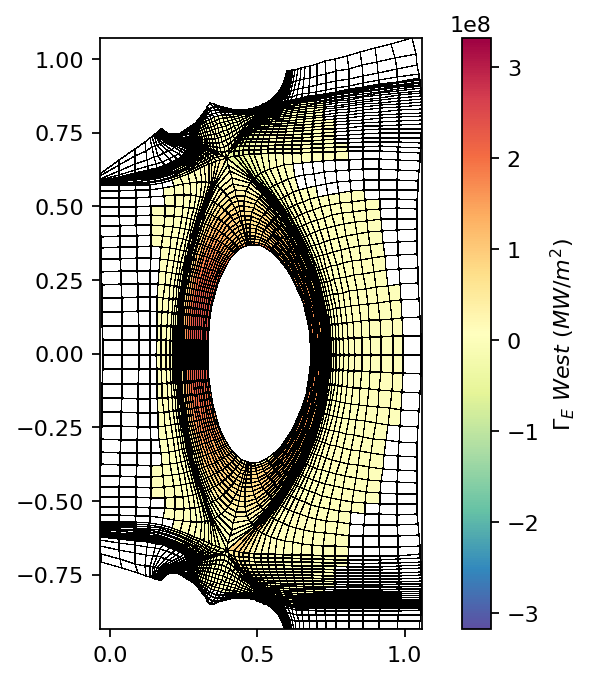

In [12]:
import matplotlib as mpl
logscale = False
%matplotlib inline
fig, ax = plt.subplots(dpi = 160)

Fluxes = load_fluxes_files(os.path.join(path, "Results"), nZones=nZones, iFluxes = [iPlasma])
Values = []
for i in range(len(PosPlots[iPlasma])): 
    Values.append([])
    for k in range(nZones):
        if(iValues[iPlasma][i] > -1):
            if(iPars[iPlasma][i] > -1):
                Values[-1].append(Fluxes[0][k].Values[iValues[iPlasma][i]][:,:,iPars[iPlasma][i]])
            elif(iPars[iPlasma][i] == -1):
                Values[-1].append(Fluxes[0][k].Values[iValues[iPlasma][i]][:,:,1]-Fluxes[0][k].Values[iValues[iPlasma][i]][:,:,0])	#S-N
            elif(iPars[iPlasma][i] == -2):
                Values[-1].append(Fluxes[0][k].Values[iValues[iPlasma][i]][:,:,3]-Fluxes[0][k].Values[iValues[iPlasma][i]][:,:,2])	#W-E
            elif(iPars[iPlasma][i] == -3):
                Values[-1].append(Fluxes[0][k].Values[iValues[iPlasma][i]][:,:,1]-Fluxes[0][k].Values[iValues[iPlasma][i]][:,:,0]+Fluxes[0][k].Values[iValues[iPlasma][i]][:,:,3]-Fluxes[0][k].Values[iValues[iPlasma][i]][:,:,2]) #S-N+W-E



Vmin	= np.empty((nZones, len(PosPlots[iPlasma])), dtype='f8')
Vmax	= np.empty((nZones, len(PosPlots[iPlasma])), dtype='f8')
nn		= 0
for k in range(nZones):
    ii,jj  = np.where(Zones[k].Chi != 1.)
    if(len(ii) > 0):
        for i in range(len(PosPlots[iPlasma])):
            Vmin[nn,i]	= np.min(Values[i][k][ii,jj])*FluxFacts[iPlasma][i]
            Vmax[nn,i]	= np.max(Values[i][k][ii,jj])*FluxFacts[iPlasma][i]
        nn	+= 1

i = 3
iPlasma = 1

[print(x) for x in Titles[iPlasma]]
print("CHOICE:\n",Titles[iPlasma][i])
print("Factor:", FluxFacts[iPlasma][i])

Vmin = np.min(Vmin[:nn,:], axis=0)
Vmax = np.max(Vmax[:nn,:], axis=0)
norm = create_norm(logscale, None, Vmin[i], Vmax[i])

linear_threshold = min(abs(Vmin[i]), abs(Vmax[i])) * 0.8
# norm = mpl.colors.SymLogNorm(linear_threshold, vmin=Vmin[i], vmax=Vmax[i])
norm = mpl.colors.Normalize(vmin=Vmin[i], vmax=Vmax[i])

for k in range(nZones):
    if(no_shade == 0):
        if(no_mask == 0):	MaskedValues = np.ma.masked_where(extend_mat1(Zones[k].Chi) == 1., extend_mat1(Values[i][k]*FluxFacts[iPlasma][i]))
        else:				MaskedValues = extend_mat1(Values[i][k]*FluxFacts[iPlasma][i])
    else:
        if(no_mask == 0):	MaskedValues = np.ma.masked_where(Zones[k].Chi == 1., Values[i][k]*FluxFacts[iPlasma][i])
        else:				MaskedValues = Values[i][k]*FluxFacts[iPlasma][i]
        
    im = ax.pcolormesh(Zones[k].gridR, Zones[k].gridZ, MaskedValues, shading="flat",  
                       cmap = "Spectral_r", 
                       norm = norm,
                       linewidth = 0.00, color="k", antialiaseds = True, alpha =1)
    
cb = fig.colorbar(im, ax=ax)
cb.set_label(Titles[iPlasma][i])
ax.set_aspect("equal")

ax.set_ylim(None, 0)

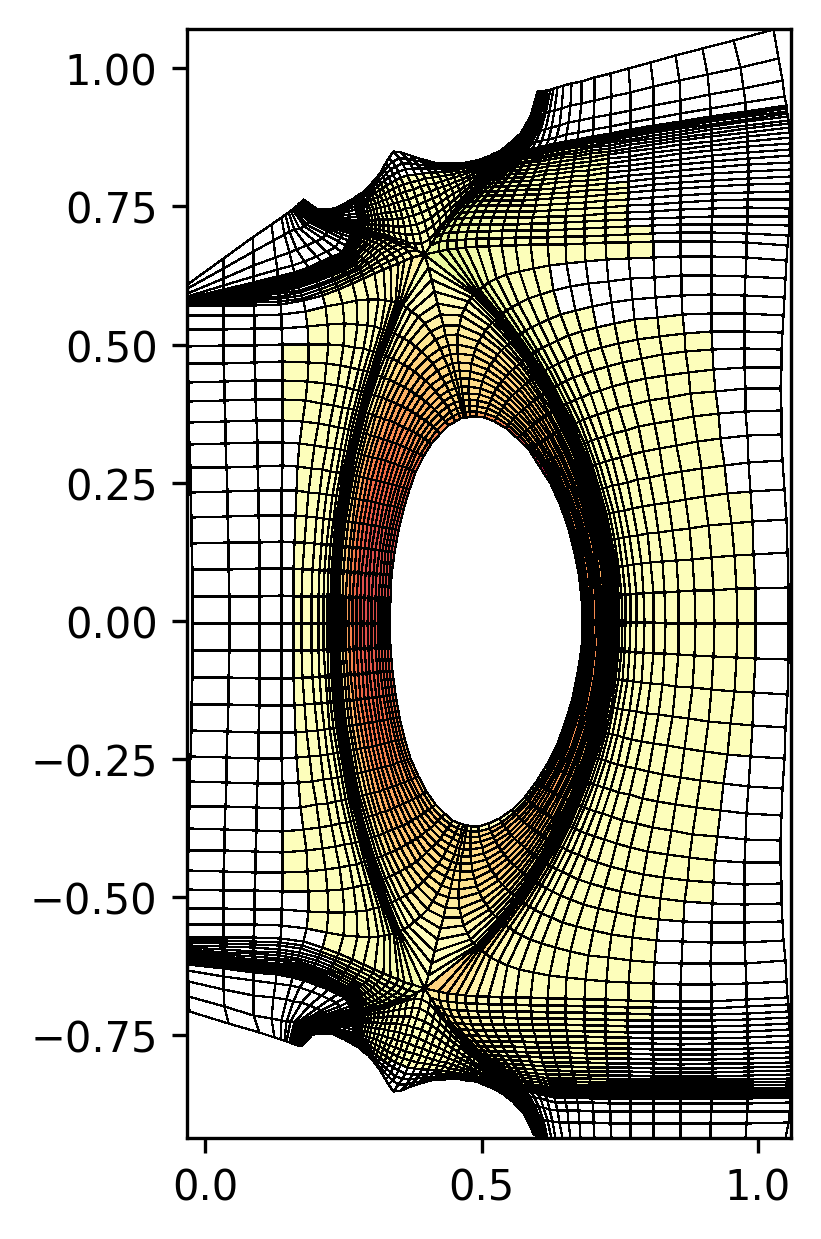

In [20]:
fig, ax = plt.subplots(dpi = 300)

for k in range(nZones):
    if(no_shade == 0):
        if(no_mask == 0):	MaskedValues = np.ma.masked_where(extend_mat1(Zones[k].Chi) == 1., extend_mat1(Values[i][k]*FluxFacts[iPlasma][i]))
        else:				MaskedValues = extend_mat1(Values[i][k]*FluxFacts[iPlasma][i])
    else:
        if(no_mask == 0):	MaskedValues = np.ma.masked_where(Zones[k].Chi == 1., Values[i][k]*FluxFacts[iPlasma][i])
        else:				MaskedValues = Values[i][k]*FluxFacts[iPlasma][i]
        
    im = ax.pcolormesh(Zones[k].gridR, Zones[k].gridZ, MaskedValues, shading="flat",  
                       cmap = "Spectral_r", 
                       norm = norm,
                       linewidth = 0.3, color="k", antialiaseds = True, alpha =1.0)
    
ax.set_aspect("equal")

## Read fluxes

In [5]:
try:
    FluxiF	 = np.loadtxt(os.path.join(path,"soledge2D.ion_fluxes_wall_1"), dtype='f8')
#            		[0:iTri, 1:iSide, 2:iProp, 3:dlSurf, 
#					 4:Flux_Ion_Incident, 			5:Flux_Atom_Emitted_from_Ion]
except:
    print("\tError: Not found "+ path+"soledge2D.ion_fluxes_wall_1")
    exit()
Fluxi =  FluxiF[zOrder,4]*1e-22
FluxiF  = 0

In [6]:
#Reads neutral flux
FluxiN=[]
try:
    FluxiN.append(np.loadtxt(os.path.join(path, "soledge2D.atoms_fluxes_wall_1"), dtype='f8'))
#            		[0:iTri, 1:iSide, 2:iProp, 3:dlWall, 
#					 4:Flux_Atom_Incident, 			5:Flux_Mol_Incident,
#					 6:Flux_Atom_Emitted_from_Ion, 	7:Flux_Mol_Emitted_from_Ion,
#					 8:Flux_Atom_Emitted_from_Atom, 9:Flux_Mol_Emitted_from_Atom]
    i=2
    while(os.path.isfile('./soledge2D.atoms_fluxes_wall_'+str(i))):
        FluxiN.append(np.loadtxt(path+"soledge2D.atoms_fluxes_wall_"+str(i), dtype='f8'))
        i=i+1
except:
    print("\tError: Not found "+ path+"soledge2D.atoms_fluxes_wall_1")
    exit()

In [7]:
fluxN=[]	#Neutral flux to the wall	[[fD][fD2][fI1]...[fIn]]
fluxN.append(FluxiN[0][zOrder,4])
fluxN.append(FluxiN[0][zOrder,5])
for i in range(len(FluxiN)-1):
    fluxN.append(FluxiN[i+1][zOrder,4])
for i in range(len(fluxN)):
    fluxN[i]=fluxN[i]*1e-22

try:
    details = False
    if(details):
        EFluxF	 = np.loadtxt(os.path.join(path, "soledge2D.energy_fluxes_details_1"), dtype='f8', comments="%")
#			[0:dlWall, 
#			1:Flux_Energy_incident_Electron, 	2:Flux_Energy_incident_Ions
#			3:Flux_Energy_Total,				4:Flux_Energy_incident_Atoms,
#			5:Flux_Energy_Radiation_Atoms,		6:Flux_Energy_Rad_Recombination,
#			7:Flux_Energy_Recombination_in_Wall,8:Flux_Energy_incident_Molecules]
        FluxEe		= EFluxF[zOrder,1]*1.e-6
        FluxEi		= EFluxF[zOrder,2]*1.e-6
        FluxETot	= EFluxF[zOrder,3]*1.e-6
        FluxERadTot	= EFluxF[zOrder,5]*1.e-6

    else:
        EFluxF	 = np.loadtxt(os.path.join(path, "soledge2D.energy_fluxes_1"), dtype='f8', comments="%")
#           [0:iTri, 1:iSide, 2:iProp, 3:dlWall, 
#			 4:Flux_Energy_incident_Ions_EIRENE	5:Flux_Energy_incident_Electron,
#			 6:Flux_Energy_incident_Ions		7:Flux_Energy_Total,				
#			 8:Flux_Energy_incident_Atoms,		9:Flux_Energy_Radiation		
#			 10:Area]
        FluxEe		= EFluxF[zOrder,5]*1.e-6
        FluxEi		= EFluxF[zOrder,6]*1.e-6
        FluxETot	= EFluxF[zOrder,7]*1.e-6
        FluxERadTot	= EFluxF[zOrder,9]*1.e-6
except:
    print("\tError: Not found "+ path+"soledge2D.energy_fluxes_details_1")
    exit()

FluxETotei	= FluxETot-FluxERadTot
EFluxF	= 0

## Format and scaling

In [8]:
TFluxi  		= 2.*np.pi*np.sum(Fluxi*WalldL*WallR)
TFluxEe			= 2.*np.pi*np.sum(FluxEe*WalldL*WallR)
TFluxEi			= 2.*np.pi*np.sum(FluxEi*WalldL*WallR)
TFluxETot		= 2.*np.pi*np.sum(FluxETot*WalldL*WallR)
TFluxERadTot	= 2.*np.pi*np.sum(FluxERadTot*WalldL*WallR)
TFluxETotei		= 2.*np.pi*np.sum(FluxETotei*WalldL*WallR)

TaFlux = 2.*np.pi*np.sum(fluxN[0]*WalldL*WallR)
TmFlux = 2.*np.pi*np.sum(fluxN[1]*WalldL*WallR)
if (len(fluxN)>2):
    TnFluxi = 2.*np.pi*np.sum(fluxN[2]*WalldL*WallR)

sTFluxi 		= "{:0.3f}".format(TFluxi)				#D+ total aion flux to the wall
sTFluxETot		= "{:0.3f}".format(TFluxETot)
sTFluxETotei	= "{:0.3f}".format(TFluxETotei)
sTFluxERadTot	= "{:0.3f}".format(TFluxERadTot)

sTaFlux = "{:0.3f}".format(TaFlux)				#D total atom flux from the wall
sTmFlux= "{:0.3f}".format(TmFlux)				#D2 total molecular flux from the wall
if (len(FluxiN)>2):
    sTnFluxi = "{:0.3f}".format(TnFluxi)

print("TFluxEe       =",TFluxEe)
print("TFluxEi       =",TFluxEi)
print("TFluxETot     =",TFluxETot)
print("TFluxERadTot  =",TFluxERadTot)
print("TFluxi        =",TFluxi*1e22)			#D+ total aion flux to the wall
print("TfluxD         =",TaFlux*1e22)			#D total atom flux to the wall
print("TfluxD_2       =",TmFlux*1e22)			#D2 total molecular flux to the wall
if (len(FluxiN)>2):
    print("Tflux_i        =",TnFluxi*1e22)				#Impurity total atom flux from the wall
    print("C_div         =",TnFluxi/2/TmFlux*100,"%")

TFluxEe       = 0.6168930615045548
TFluxEi       = 0.6903952429611567
TFluxETot     = 1.5904124434022942
TFluxERadTot  = 0.02211827896714441
TFluxi        = 1.9502165113161627e+22
TfluxD         = 4.064725400006821e+22
TfluxD_2       = 2.1232080600222463e+22


## Plot prep

In [9]:
#	Prepare for plotting

if(save == "pdf"):	pdf = PdfPages("plot1d_wall_fluxes_t={:.3f}.".format(RefPar.time)+save)   #pdf in one file only

Fig = []
Ax  = []
Titles	   = ["$\Gamma_{TotI}="+sTFluxi+"\ (*10^{22})$",
                "$\Gamma_{TotE}="+sTFluxETot+",\ \Gamma_{Tot,ei}="+sTFluxETotei+",\ \Gamma_{Tot,Rad}="+sTFluxERadTot+"\ (MW)$",
                "$\Gamma_{TotD}="+sTaFlux+",\ \Gamma_{TotD2}="+sTmFlux+"\ (*10^{22})$"]
xLabels    = ["$wall\ (m)$", "$wall\ (m)$","$wall\ (m)$"]
yLabels    = ["$\Gamma_p\ (*10^{22}\ m^{-3})$", "$\Gamma_E\ (MW/m^2)$","$\Gamma_{n}\ (*10^{22}\ m^{-3})$"]


if(one_plot != 1):
    Fig.append(pyp.figure())
    for i in range(len(yLabels)):
        if((i == 0) or (no_samex != 0)):	Ax.append(Fig[0].add_subplot(len(yLabels),1,i+1))
        else:								Ax.append(Fig[0].add_subplot(len(yLabels),1,i+1, sharex = Ax[0]))

    Fig[-1].tight_layout(pad=2., w_pad=3., h_pad=3.)
else:
    for i in range(len(yLabels)):
        Fig.append(pyp.figure())

        Ax.append(Fig[i].add_subplot(111))
        Fig[-1].tight_layout()
    
for i in range(len(xLabels)):
    Ax[i].autoscale(enable=True, axis='both', tight=True)
    if(i==0):	Ax[i].set_title(os.path.basename(os.path.abspath(path))+" @ t={:.3f} s: ".format(RefPar.time)+Titles[i])
    else:		Ax[i].set_title(Titles[i])
    Ax[i].set_xlabel(xLabels[i])
    Ax[i].set_ylabel(yLabels[i])
    if(log_scale == 0):
        Ax[i].set_yscale('linear')
    else:
        Ax[i].set_yscale('log')

## Plot

In [10]:
#	Plot parameters

pl = []
pl.append(Ax[len(pl)].plot(WallL, Fluxi, label="$\Gamma_i$"))

pl.append(Ax[len(pl)].plot(WallL, FluxETot, label="$\Gamma_{E,tot}$"))

Ax[len(pl)-1].plot(WallL, FluxERadTot, label="$\Gamma_{E,Rad}$")
Ax[len(pl)-1].plot(WallL, FluxETotei, label="$\Gamma_{E,Par}$")
Ax[len(pl)-1].plot(WallL, FluxEe, label="$\Gamma_{E,e}$")
Ax[len(pl)-1].plot(WallL, FluxEi, label="$\Gamma_{E,i}$")

pl.append(Ax[len(pl)].plot(WallL, fluxN[0], label="$\Gamma_{D}$"))
Ax[len(pl)-1].plot(WallL, fluxN[1], label="$\Gamma_{D2}$")
for i in range(len(FluxiN)-1):
    Ax[len(pl)-1].plot(WallL, fluxN[i+2]*1e2, label="$\Gamma_{imp}*100$")

for i in range(len(Ax)):
    Ax[i].legend(fontsize='medium')

for figure in Fig:  figure.patch.set_facecolor('white')

if(save != "none"):
    if(save == "csv"):

        save_cvs= np.zeros((len(WallL),6), dtype='f8')
        save_cvs[:,0]  = WallR
        save_cvs[:,1]  = WallZ
        save_cvs[:,2]  = WallL
        save_cvs[:,3]  = Fluxi*1e22
        save_cvs[:,4]  = FluxETot*1e6
        save_cvs[:,5]  = FluxERadTot*1e6

        Header = "R (m), Z (m), L (m), i_flux (m^-3), Etot (W/m^2), FluxERadTot (W/m^2)"
        np.savetxt("wall_fluxes_{:s}_t={:.3f}.csv".format(os.path.basename(os.path.abspath(path)),RefPar.time),  save_cvs, header=Header, delimiter=",", fmt="%15.7e", comments="")

    else:
        for i in range(len(Fig)):
            if(one_plot != 1): Fig[i].set_size_inches(10.05,7.44)
            if(save == "pdf"):
                pdf.savefig(Fig[i])
            else:
                Fig[i].savefig("plot1d_wall_fluxes_t={:.3f}_{:d}.".format(RefPar.time,i+1)+save)

    pyp.show(block=False)
    pyp.close()
else:
    pyp.show()

if(save == "pdf"):	pdf.close()

print("plot1d_wall_fluxes: Completed")

plot1d_wall_fluxes: Completed


## Extract data with dataframe

In [23]:
# CHeck function for up to date units and labels
df = pd.DataFrame()
df["R"] = WallR    # Element R coord [m]
df["Z"] = WallZ    # Element Z coord [m]
df["L"] = WallL    # Element length [m]
df["pflux_i"] = Fluxi   # Ion particle flux [s-1]
df["hflux_tot"] = FluxETot    # [Wm-2]
df["hflux_totrad"] = FluxERadTot    # [Wm-2]
df["hflux_par_tot"] = FluxETotei    # 
df["hflux_par_e"] = FluxEe
df["hflux_par_i"] = FluxEi
df["hflux_a"] = fluxN[0]   # Neutral atom hflux
df["hflux_m"] = fluxN[1]   # Neutral molecule hflux
df["hflux_n"] = fluxN[0] + fluxN[1]    # Total neutral hflux
df

,R,Z,L,pflux_i,hflux_tot,hflux_totrad,hflux_par_tot,hflux_par_e,hflux_par_i,hflux_a,hflux_m,hflux_n
0,0.987017,0.016437,0.000000,0.000000,0.017715,0.000501,0.017214,4.410440e-13,0.0,0.060634,0.010353,0.070987
1,0.986665,0.081756,0.064694,0.000000,0.021681,0.000506,0.021175,0.000000e+00,0.0,0.061781,0.010982,0.072762
2,0.983368,0.145121,0.127041,0.000000,0.020725,0.000514,0.020210,1.247340e-11,0.0,0.061001,0.012303,0.073304
3,0.972790,0.203670,0.184094,0.000000,0.023187,0.000526,0.022661,4.846739e-11,0.0,0.061407,0.010731,0.072138
4,0.964451,0.234415,0.190752,0.000000,0.024758,0.000540,0.024218,4.789705e-11,0.0,0.057134,0.009925,0.067059
...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.959833,-0.251438,4.919134,0.000000,0.021513,0.000521,0.020992,2.530495e-11,0.0,0.062973,0.011615,0.074588
351,0.967534,-0.223057,4.949724,0.000000,0.017166,0.000512,0.016654,4.842809e-11,0.0,0.058262,0.010757,0.069019
352,0.978912,-0.178217,5.011663,0.000045,0.018667,0.000502,0.018165,4.556479e-11,0.0,0.060014,0.011758,0.071772
353,0.986506,-0.115438,5.077064,0.000000,0.018037,0.000495,0.017542,0.000000e+00,0.0,0.058804,0.011375,0.070179


In [26]:
%matplotlib inline

AttributeError: Line2D.set() got an unexpected keyword argument 'colors'

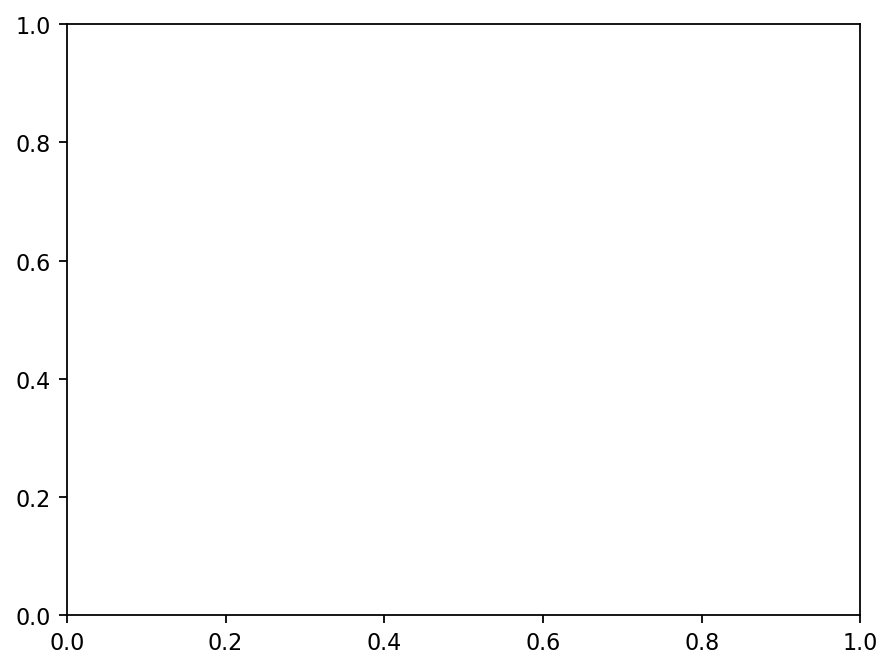

In [37]:
fig, ax = plt.subplots(dpi = 160)

ax.plot(df["R"], df["Z"], colors = df["hflux_par_tot"])
ax.set_aspect("equal")